In [ ]:
!nvidia-smi

In [ ]:
import torch
from torch import nn # All the building blocks for neural networks
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

### Setup device-agnostic code (running the code on any available accelerator):

PyTorch is capable of running on both GPU or CPU

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.cuda.device_count()
device

### Scalar & Vector

In [ ]:
scalar = torch.tensor(5)
scalar

In [ ]:
scalar.ndim

In [ ]:
vector = torch.tensor([1,3])
vector

In [ ]:
vector.ndim

In [ ]:
vector.shape

### Matrix

In [ ]:
MAT = torch.tensor([[1, 2],[3, 3], [3,4]])
MAT.ndim
MAT.shape

### Tensor

In [ ]:
TEN = torch.tensor([[[1,2,3],
                     [2,3,3],
                     [1,1,1],
                     [10,10,10]],
                    [[2,2,2],
                     [1,1,1],
                     [10.,11,11],
                     [13,13,13]]])
TEN.ndim
TEN.size
TEN.shape
TEN.dim
TEN.dtype

### Random Tensor

In [ ]:
random_ten = torch.rand(size=(4,2,3,1))
print(random_ten)
random_ten.ndim, random_ten.shape

In [ ]:
zero_ten = torch.ones((2,3,10))
print(zero_ten)

### arange

In [ ]:
print(torch.arange(0,10))
print(torch.arange(0,10,2))

In [ ]:
torch.tensor([200,200,400],dtype=int,device="cpu")
torch.tensor([200,200,400],dtype=int,device="cuda")

In [ ]:
int_32_tensor = torch.tensor([1,2,3,4,5], device='cpu' ,dtype=torch.int32)
float_16_tensor = torch.tensor([3,1,2,3,3], dtype=torch.float16)

(int_32_tensor * float_16_tensor).device

### Tensor Manipulation

In [ ]:
vec_tensor = torch.tensor([[1,2.3,2.1,3,10,0,1001,-2]], dtype=torch.int16, device="cpu")
mat_tensor_1 = torch.tensor([[1,2.3,2.34444], [22,1,300]], dtype=torch.float, device="cpu")
mat_tensor_2 = torch.tensor([[1,2,3], [1,1,3]], dtype=torch.float, device="cpu")

print(mat_tensor_1.T)
print(f"original tensor: \n{mat_tensor_1}\n")
print(f"addition: \n{mat_tensor_1 + 10.2}\n")
print(f"element-wise multiplication: \n{mat_tensor_1 * 2}\n")
print(f"matrix multiplication (dot product): \n{mat_tensor_1*mat_tensor_2}\n")
print(f"matrix multiplication (dot product): \n{torch.matmul(mat_tensor_1,mat_tensor_1.T)}\n")
print(f"matrix multiplication (dot product): \n{torch.mm(mat_tensor_1,mat_tensor_1.T)}\n")


### Tensor Aggregation (min, max, mean, sum and ...)

In [ ]:
mat_tensor_1.dtype
print(f"some_tensor_1: \n{mat_tensor_1}\n")
print(f"MIN: {mat_tensor_1.min()}\n")
print(f"MAX: {mat_tensor_1.max()}\n")
print(f"MEAN: {mat_tensor_1.mean()}\n")
print(f"ARGMIN: {mat_tensor_1.argmin()}\n")  # positional min
print(f"ARGMAX: {mat_tensor_1.argmax()}\n")  # positional max
mat_tensor_1[1,2]

### Reshaping, Stacking, Squeezing, Unsqueesing tensors:

In [ ]:
print(f"vector: {vec_tensor}", vec_tensor.shape,"\n")
reshaped_vec_tensor = vec_tensor.reshape(2,4)
print(f"Reshaped vec_tensor: \n{reshaped_vec_tensor}", reshaped_vec_tensor.shape, "\n")

reshaped_vec_tensor.view(4,2)  # view shares the same memory as reshaped_vec_tensor, lets say it is just a differet view of reshaped_vec_tensor.
stacked_vec_tensor = torch.stack([vec_tensor, vec_tensor, vec_tensor], dim=0)  # vertical
print(f"stacked vec_tensor: \n{stacked_vec_tensor}", stacked_vec_tensor.shape, "\n")

stacked_vec_tensor = torch.stack([vec_tensor, vec_tensor, vec_tensor], dim=1)  # horizontal
print(f"stacked vec_tensor: \n{stacked_vec_tensor}", stacked_vec_tensor.shape, "\n")

squeezed_vec_tensor = vec_tensor.squeeze()  # removes all single dimensions from the target tensor
print(f"squeezed vec_tensor: \n{squeezed_vec_tensor}", squeezed_vec_tensor.shape, "\n")

unsqueezed_vec_tensor = squeezed_vec_tensor.unsqueeze(dim=0)  # adds a single dimension to the target tensor at a specific dim
print(f"unsqueezed vec_tensor: \n{unsqueezed_vec_tensor}", unsqueezed_vec_tensor.shape, "\n")

permuted_vec_tensor = reshaped_vec_tensor.permute(1,0)  # rearranges/swap the dimensions of a target tensor in a specified order (share same memory): second dim first, first dim come to second
print(f"permuted vec_tensor: \n{permuted_vec_tensor}", permuted_vec_tensor.shape, "\n")

### Indexing (similar to Numpy)

In [ ]:
mat_tensor_3 = torch.arange(10,19).reshape(1,3,3)
print(f"mat_tensor_3: \n{mat_tensor_3}", mat_tensor_3.shape)
print(mat_tensor_3[0,2,2])
print(mat_tensor_3[0,:,2])
print(mat_tensor_3[0,2,:])
print(mat_tensor_3[0][2])

### Pytorch Tensors and Numpy

In [ ]:
np_array = np.arange(1,10)
torch_vec = torch.arange(1,10)
print(np_array, "\n", torch_vec)

print()
print(torch.from_numpy(np_array))  # convert numpy to tensor
print(torch_vec.numpy())  # convert tensor to numpy

### Reproducibility; taking out of random
In short, how a Neural Network(NN) learns:

`Start with a random number` -> `tensor operations` -> `update random numbers trying to make them 
a better representation of the data` -> `again` -> `again` -> ...

To reduce randomness in NN, PyTorch introduced a concept called **random seed** which `flavors` the randomness. (makes the randomness reproducible)

In [ ]:
RANDOM_SEED = 42

torch.manual_seed(RANDOM_SEED)
rand_tensor_A = torch.rand(1,2,4)
torch.manual_seed(RANDOM_SEED)
rand_tensor_B = torch.rand(1,2,4)
print(f"rand_tensor_A: \n{rand_tensor_A}\n")
print(f"rand_tensor_A: \n{rand_tensor_B}\n")

print(rand_tensor_A == rand_tensor_B)

In [ ]:
torch.cuda.is_available()
torch.cuda.device_count()

## PyTorch Workflow

Using linear regression formula to make a straight line with known parameters.

In [ ]:
weight = 0.7
bias = 0.3

start  = 0
end = 1 
step = 0.02
x = torch.arange(start, end, step).unsqueeze(dim=1)  # feature (input)
y = weight * x + bias  # label (ouputs)

x[:10], y[:10]  

#### Splitting data into training and test sets

In [ ]:
len(x), len(y)

In [ ]:
train_set = int(0.8 * len(x))
x_train, y_train = x[:train_set], y[:train_set]
x_test, y_test = x[train_set:], y[train_set:]

len(x_train), len(y_train), len(x_test), len(y_test)    

### Visualize, visualize, visualize

In [ ]:
def plot_predictions(train_data=x_train, train_labels=y_train, test_data=x_test, test_labels=y_test, predictions=None):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c = "b", s = 4, label="Training data")
    plt.scatter(test_data, test_labels, c = "g", s = 4, label="Testing data")
    
    if predictions is not None:
        plt.scatter(test_data, predictions, c = "r", s = 4, label="Predictions")
    
    plt.legend(prop={"size":14})

In [ ]:
plot_predictions()

# Building our first PyTorch __model__

Creating a linear regression model class:

In [ ]:
class LinearRegresssionModel(nn.Module):  # nn.Module is the base class for all neural network modules in PyTorch (containts all the build blocks for NN)
    def __init__(self):  # constructor
        super().__init__()
        # Our model starts with random weights and bias:
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        
    # Forward method to define the computation in the model.
    def forward(self, x: torch.Tensor) -> torch.Tensor:  # x is input
        return self.weights * x + self.bias  # Linear regression equation

### PyTorch model building essentials:

* __torch.nn__ -> Contains all of the buildings for computatinal graphs (NN)
* __torch.nn.Parameter__ -> What parameters should our model try and learn
* __torch.nn.Module__ -> The base class for all NN modules, if you subclass it you should overwrite forward()
* __torch.optim__ -> this where the optimizer in PyTorch live, they will help with gradient descent
* __def forward()__ -> All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation.

### Checking the contents of our PyTorch model:

Using `.parameters()`

In [89]:
torch.manual_seed(42)  # set the random seed for reproducibility
model_0 = LinearRegresssionModel()
list(model_0.parameters())  # Check out the parameters in our model

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()  # list named parameters with their values

### Making predictions using `torch.inference_mode()` (Validation / Test)

How well the model predicts `y_test` from `x_test`

In [ ]:
# Make predictions with model (good practice to make predictions under inference mode):
with torch.inference_mode():  # No graph building (NN), no gradient tracking, no .backward(), intended for inference only.
    y_pred = model_0(x_test)  # forward pass
    # print("inference mode:")

y_pred

# with torch.no_grad():  # another way to turn off gradients, however inference_mode is prefered (faster)
#     y_pred = model_0(x_test)
#     print("no grad:")
#     print(y_pred)



In [ ]:
plot_predictions(predictions=y_pred)

The whole idea of trainig is for a model to move from some uknown parameters (most often random) to some known parameters.

#### Solution:

__Loss function__: One way to measure how poor or how wrong our model predicts vs. the ideal outputs, is loss funtion / cost function / criterion

__Optimizer__: Takes into account the loss of a model and adjusts the model's parameters (e.g. weights and bias) to improve the loss function.

* __params__: the model parameters you'd like to optimize, i.e. params=model_0.parameters()
* __lr__ (learning rate): a hyperparameter that defines how big/small the optimizer changes the parameters with each step.

In [ ]:
list(model_0.parameters())

### Setting up a __Loss Function__ and __Optimizer__:

In [153]:
### Creating instances of loss function and optimizer:

loss_fun = nn.L1Loss()  # mean absolute error (MAE)
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)  # Stochastic Gradient Descent

# Building a __training__ & __testing__ loop in PyTorch:
1) __Loop__ through the data
2) __Forward pass__ -> data moving through the model (NN)
3) __Loss calculation__ -> Comparing the forward pass to ground truth labels
4) __Optimizer__
5) __Loss backward__ -> backpropagation
6) __Optimizer step__ -> gradient descent

In [ ]:
torch.manual_seed(42)

# model_0 = LinearRegresssionModel()  # create a new instance of the model to reset the parameters

epochs = 100  # TODO; Another hyperparameter that is one loop through the data.

# Track different values:
epoch_count = []
loss_values = []
test_loss_values = []

print(f"true weight: {weight}, bias: {bias} \n")
### Training Loop ###
for epoch in range (epochs):
    model_0.train()  # (GOOD PRACTICE) set the model to training mode (model remember the parameters it has), sets all the parameters that require gradients to require gradients
    
    y_pred = model_0(x_train)  # forward pass ("forward propagation")
    loss = loss_fun(y_pred, y_train)  # compute the "loss" (predictions vs. labels)
    optimizer.zero_grad()  # zero grad "optimizer" (set the gradients to zero)
    loss.backward()  # "backpropagation" (compute the gradients of each parameter with respect to the loss)
    optimizer.step()  # update model parameters (weights) via "gradient descent"

    ### Testing/Evaluating Loop ###
    model_0.eval()  # (GOOD PRACTICE) Turns off different setting s in the model not needed for evaluation/test(turns off "dropout" and "batch norm" (if any))
    with torch.inference_mode():  # turn off gradient tracking and a couple of more things behind the scens for inference/testing
        test_pred_new = model_0(x_test) # forward pass: just using the trained model to make predictions
        test_loss = loss_fun(test_pred_new, y_test)  # compute the loss
        # print(f"Test loss: {test_loss:.5f}")

    # if epoch % 2 == 0:  # print every 2 epochs
    epoch_count.append(epoch)
    loss_values.append(loss.detach().numpy())
    test_loss_values.append(test_loss.detach().numpy())
    
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Weight: {model_0.weights.item():.3f} | Bias: {model_0.bias.item():.3f} | Test loss: {test_loss:.3f}" )

model_0.state_dict()

true weight: 0.7, bias: 0.3 

Epoch: 0 | Loss: 1.19724 | Weight: -1.123 | Bias: -0.186 | Test loss: 2.109
Epoch: 1 | Loss: 1.19724 | Weight: -1.123 | Bias: -0.186 | Test loss: 2.109
Epoch: 2 | Loss: 1.19724 | Weight: -1.123 | Bias: -0.186 | Test loss: 2.109
Epoch: 3 | Loss: 1.19724 | Weight: -1.123 | Bias: -0.186 | Test loss: 2.109
Epoch: 4 | Loss: 1.19724 | Weight: -1.123 | Bias: -0.186 | Test loss: 2.109
Epoch: 5 | Loss: 1.19724 | Weight: -1.123 | Bias: -0.186 | Test loss: 2.109
Epoch: 6 | Loss: 1.19724 | Weight: -1.123 | Bias: -0.186 | Test loss: 2.109
Epoch: 7 | Loss: 1.19724 | Weight: -1.123 | Bias: -0.186 | Test loss: 2.109
Epoch: 8 | Loss: 1.19724 | Weight: -1.123 | Bias: -0.186 | Test loss: 2.109
Epoch: 9 | Loss: 1.19724 | Weight: -1.123 | Bias: -0.186 | Test loss: 2.109
Epoch: 10 | Loss: 1.19724 | Weight: -1.123 | Bias: -0.186 | Test loss: 2.109
Epoch: 11 | Loss: 1.19724 | Weight: -1.123 | Bias: -0.186 | Test loss: 2.109
Epoch: 12 | Loss: 1.19724 | Weight: -1.123 | Bias: -0.18

OrderedDict([('weights', tensor([-1.1229])), ('bias', tensor([-0.1863]))])

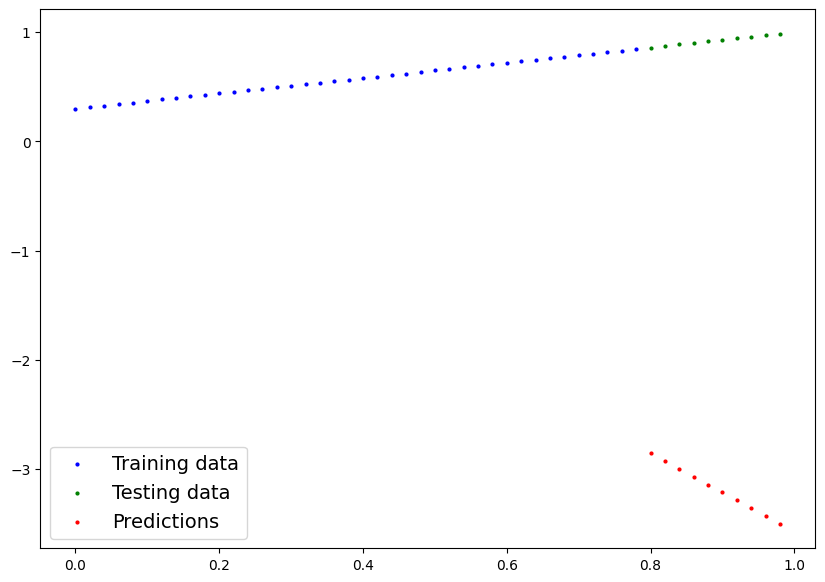

In [149]:
# plot_predictions(predictions=y_pred)
plot_predictions(predictions=test_pred_new)